# Best plan for revenue

I am working for a telecom operator Megaline. the company offers two plans, ultimate and surf to it's clients.
my job is to find which of the plans brings better revenue to the company so they will know to adjust the advertising budget.

to help the company I need to:
   1. inspect the data for any impurities, missing values, duplicates,parameters that need to be changed.
   2. prepare the data for analysis.
      change data types, delete parameters that can skew the data,
      create new tables and columns so i can later better analyze the data. 
   3. analyze the data, see if there are any outliers in the data that may disturb the analysis.
      see a pattern of behavior in our clients in the different plans by looking at there distribution.
   4. test our hypotheses which we formed based on our analysis.
      is the average distribution of the plans the same, or is it different, which one is more profitable.  

## Outline of analysis

In [1]:
import pandas as pd                                           
import numpy as np
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english')
import time
import datetime 
from datetime import datetime
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import norm

In [2]:
try:
    calls_df = pd.read_csv('megaline_calls.csv') 
    
except:
    calls_df = pd.read_csv('/datasets/megaline_calls.csv') 

try:
    internet_df = pd.read_csv('megaline_internet.csv') 
    
except:
    internet_df = pd.read_csv('/datasets/megaline_internet.csv') 
    
try:
    messages_df = pd.read_csv('megaline_messages.csv') 
    
except:
    messages_df = pd.read_csv('/datasets/megaline_messages.csv') 
    
try:
    plans_df = pd.read_csv('megaline_plans.csv') 
    
except:
    plans_df = pd.read_csv('/datasets/megaline_plans.csv') 
    
try:
    users_df = pd.read_csv('megaline_users.csv') 
    
except:
    users_df = pd.read_csv('/datasets/megaline_users.csv') 

# Data inspection 

In [3]:
print(calls_df.info())
print(calls_df.describe())
calls_df.head(17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [4]:
print(internet_df.info())
print(internet_df.describe())
internet_df.head(17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [5]:
print(messages_df.info())
print(messages_df.describe())
messages_df.head(17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [6]:
print(plans_df.info())
print(plans_df.describe())
plans_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000        

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
print(users_df.info())
print(users_df.describe())
users_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


## midway inspection conclusion 

things that i need to fix:
   1. i need to change the data type of the "duration" column in calls_df to int.
   2. need to see if i need to delete the all rows that have a "call_duration" of 0. it my be that it counted unanswered calls.
   3. i need to see the the usage of the calls, internet, messages and revenue per month for each client.
   4. change the internet usage to Gb from Mb.

# Prepare the data

## change data type

lets change the duration column in calls_df table to int, using astype().

In [8]:
calls_df["duration"] = np.ceil(calls_df["duration"]).astype(int)
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%dT%H:%M:%S')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%dT%H:%M:%S')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%dT%H:%M:%S')
users_df['session_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%dT%H:%M:%S')
calls_df.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


## fixing errors

lets see if the amount of calls that are 0 min, have a substantial affect on the duration.

In [9]:
calls_df.query('duration == 0').count()/calls_df.shape[0]*100

id           19.482339
user_id      19.482339
call_date    19.482339
duration     19.482339
dtype: float64

it seems that the the unanswered calls take about 20% of all calls. this mite be a problem, if we would like to understand our clients behavior patterns. because of that i think that i should get rid of all rows with 0 time calls.

In [10]:
calls_df.drop(calls_df.query('duration == 0').index, inplace = True)
calls_df.shape

(110901, 4)

In [11]:
internet_df.query('mb_used == 0').count()/internet_df.shape[0]*100

id              13.114238
user_id         13.114238
session_date    13.114238
mb_used         13.114238
dtype: float64

same thing goes to the internet, there are to many 0 values. i need to get reed of the values.

In [12]:
internet_df.drop(internet_df.query('mb_used == 0').index, inplace = True)
calls_df.shape

(110901, 4)

## amount and duration of calls per month

by changing the call_date column to datetime format, i managed to create a month column using dt.month.
using the new month column i managed to create a pivot table that shows the the number of calls and sum of calls for each month, for each client.

In [13]:
calls_df["month"] = calls_df["call_date"].dt.month

user_usege = calls_df.pivot_table(index=["user_id","month"],values= ["duration"], aggfunc={"duration":[np.sum,"count"]})

user_usege

duration     
                 count  sum
user_id month              
1000    12          16  124
1001    8           22  182
        9           38  315
        10          47  393
        11          49  426
...                ...  ...
1498    12          32  339
1499    9           35  346
        10          41  385
        11          39  308
        12          56  496

[2256 rows x 2 columns]

## amount of messages per month

using the same thing i used for in the privies step, i created a pivot table that shows the number messages sent by each client, each month 

In [14]:
messages_df["month"] = messages_df["message_date"].dt.month

sum_of_messages = messages_df.pivot_table(index=["user_id","month"], values="id",aggfunc="count")

sum_of_messages["messages"] = sum_of_messages["id"]
del sum_of_messages["id"]
sum_of_messages

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36
...                 ...
1496    9            21
        10           18
        11           13
        12           11
1497    12           50

[1806 rows x 1 columns]

## gb used per month

using the same thing as in the privies step, i created a pivot table that shows the internet usage for each client, each month.
then i changed the internet value from mb to gb, by dividing the mb by a 1000 and rounding them up using the np.ceil.

In [15]:
internet_df["month"] = internet_df["session_date"].dt.month

sum_of_gb = internet_df.pivot_table(index=["user_id","month"], values="mb_used",aggfunc="sum")

sum_of_gb["mb_used"] = sum_of_gb["mb_used"] / 1024
sum_of_gb["mb_used"] = np.ceil(sum_of_gb["mb_used"])
sum_of_gb["gb_used"] = sum_of_gb["mb_used"]
del sum_of_gb["mb_used"]
sum_of_gb

gb_used
user_id month         
1000    12         2.0
1001    8          7.0
        9         14.0
        10        22.0
        11        19.0
...                ...
1498    12        23.0
1499    9         13.0
        10        20.0
        11        17.0
        12        22.0

[2277 rows x 1 columns]

In [16]:
plans_df["mb_per_month_included"] = plans_df["mb_per_month_included"] / 1024
plans_df["mb_per_month_included"] = np.ceil(plans_df["mb_per_month_included"])
plans_df.rename(columns = {"mb_per_month_included": "gb_per_month_included", "plan_name":"plan"}, inplace = True)
plans_df

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## revenue per month

using the merge method i connected all the tables i created to the user_df table. then, i created a new column that shows the revenue from each client each month. to calculate the revenue from each client, i had to create a def that recognized the plan that each client uses, did the client go over his plan, and if so, how match. 

In [17]:
revenue_table = sum_of_gb.merge(user_usege, on = ["user_id","month"], how= "outer")
revenue_table = revenue_table.merge(sum_of_messages,on = ["user_id","month"], how = "outer")
tem = users_df.merge(plans_df, on = ["plan"], how = "left")
revenue_table = tem.merge(revenue_table, on = ["user_id"], how= "outer")
revenue_table

C:\programing files\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,session_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)","(duration, sum)",messages
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12-24,1000,30.0,3000,70,7,0.01,0.01,2.0,16.0,124.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08-13,50,15.0,500,20,10,0.03,0.03,7.0,22.0,182.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08-13,50,15.0,500,20,10,0.03,0.03,14.0,38.0,315.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08-13,50,15.0,500,20,10,0.03,0.03,22.0,47.0,393.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08-13,50,15.0,500,20,10,0.03,0.03,19.0,49.0,426.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2018-02-04,50,15.0,500,20,10,0.03,0.03,23.0,32.0,339.0,NaN
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,2018-05-06,50,15.0,500,20,10,0.03,0.03,13.0,35.0,346.0,NaN
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,2018-05-06,50,15.0,500,20,10,0.03,0.03,20.0,41.0,385.0,NaN
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,2018-05-06,50,15.0,500,20,10,0.03,0.03,17.0,39.0,308.0,NaN


In [18]:
del revenue_table["session_date"]
del revenue_table["reg_date"]
del revenue_table["churn_date"]
print(sum_of_gb["gb_used"].sum(),sum_of_messages["messages"].sum(),user_usege[("duration","sum")].sum())
print(revenue_table["gb_used"].sum(),revenue_table["messages"].sum(),revenue_table[("duration","sum")].sum())
revenue_table

38684.0 76051 984347
38684.0 76051.0 984347.0


,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)","(duration, sum)",messages
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,2.0,16.0,124.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,7.0,22.0,182.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,14.0,38.0,315.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,22.0,47.0,393.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,49.0,426.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,20,10,0.03,0.03,23.0,32.0,339.0,NaN
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,13.0,35.0,346.0,NaN
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,20.0,41.0,385.0,NaN
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,17.0,39.0,308.0,NaN


In [19]:
revenue_table.rename(columns={("duration","sum"):"call_total"},inplace=True)
revenue_table.fillna(0,inplace=True)
print(revenue_table["gb_used"].sum(),revenue_table["messages"].sum(),revenue_table["call_total"].sum())

38684.0 76051.0 984347.0


In [23]:
def revenue_per_month(row):
    
    plan = row["usd_monthly_pay"]
    
    call_time = row["call_total"]
    internet = row["gb_used"]
    num_messages = row["messages"]
    
    call_plan = row["minutes_included"]
    internet_plan = row["gb_per_month_included"]
    messages_plan = row["messages_included"]
    
    ext_int = row["usd_per_gb"]
    ext_msg = row["usd_per_message"]
    ext_min = row["usd_per_minute"]
    
    x = plan
    
    if call_time > call_plan:
        x += (call_time - call_plan)*ext_min
    if internet > internet_plan:
        x += (internet - internet_plan)*ext_int
    if num_messages > messages_plan:
        x += (num_messages - messages_plan)*ext_msg
    
    return x

In [24]:
revenue_table["revenue"] = revenue_table.apply(revenue_per_month,axis=1)
revenue_table

,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)",call_total,messages,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,2.0,16.0,124.0,11.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,7.0,22.0,182.0,30.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,14.0,38.0,315.0,44.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,22.0,47.0,393.0,53.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,49.0,426.0,36.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,20,10,0.03,0.03,23.0,32.0,339.0,0.0,100.00
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,13.0,35.0,346.0,0.0,20.00
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,20.0,41.0,385.0,0.0,70.00
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,17.0,39.0,308.0,0.0,40.00


In [25]:
revenue_table.drop_duplicates()
revenue_table

,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)",call_total,messages,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,2.0,16.0,124.0,11.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,7.0,22.0,182.0,30.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,14.0,38.0,315.0,44.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,22.0,47.0,393.0,53.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,49.0,426.0,36.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,20,10,0.03,0.03,23.0,32.0,339.0,0.0,100.00
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,13.0,35.0,346.0,0.0,20.00
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,20.0,41.0,385.0,0.0,70.00
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,17.0,39.0,308.0,0.0,40.00


## midway data preparing conclusion

1. changed the data type of duration to int.
2. deleted all 0 min calls.
3. created a table that contains call duration, messages, internet and revenue for each client per month.

# Analyze the data

now that the data has been organized, lets see the clients behavior in the deferent plans.

## surf users usage

first i'll check for outliers in the serf plan users. i'll do that by creating a table that contains only the people using surf , and then create histograms and boxplots to identify them in the deferent categories. 

In [26]:
surf_revenue_table = revenue_table.query('plan == "surf"')
surf_revenue_table

,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)",call_total,messages,revenue
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,7.0,22.0,182.0,30.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,14.0,38.0,315.0,44.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,22.0,47.0,393.0,53.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,49.0,426.0,36.0,60.00
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,46.0,412.0,44.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,20,10,0.03,0.03,23.0,32.0,339.0,0.0,100.00
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,13.0,35.0,346.0,0.0,20.00
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,20.0,41.0,385.0,0.0,70.00
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,17.0,39.0,308.0,0.0,40.00


using the query method i created a table for sorf users.

In [27]:
def boxplot_usage(column):
    Q1 = surf_revenue_table[column].quantile(0.25)
    Q3 = surf_revenue_table[column].quantile(0.75)
    IQR = Q3 - Q1
    surf_revenue_table.boxplot(column)
    plt.hlines(y = Q1-1.5*IQR, xmin = 0.9, xmax = 1.1, color = "red")
    plt.hlines(y = Q3 + 1.5*IQR, xmin = 0.9, xmax = 1.1, color = "red")

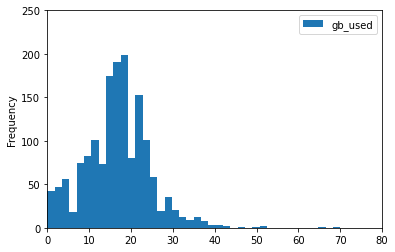

In [28]:
surf_revenue_table.plot(y = "gb_used", kind = "hist", bins = 40, xlim = (0,80), ylim = (0,250))
plt.show()

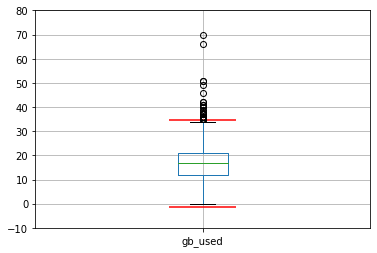

In [29]:
plt.ylim(-10,80)
boxplot_usage("gb_used")
plt.show()

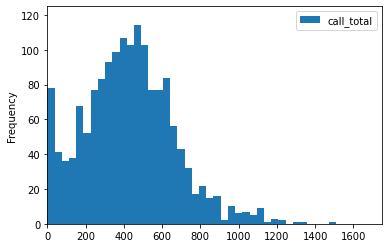

In [30]:
surf_revenue_table.plot(y = "call_total", kind = "hist", bins = 40, xlim = (0,1750), ylim = (0,125))
plt.show()

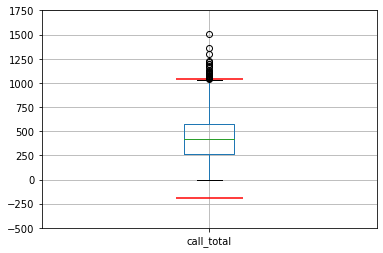

In [31]:
plt.ylim(-500,1750)
boxplot_usage("call_total")
plt.show()

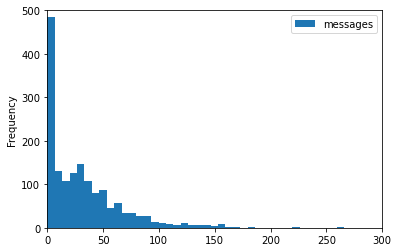

In [32]:
surf_revenue_table.plot(y = "messages", kind = "hist", bins = 40, xlim = (0,300), ylim = (0,500))
plt.show()

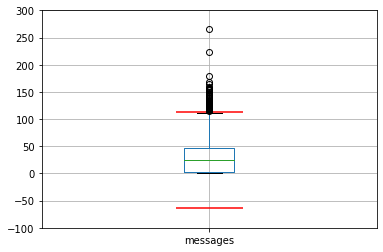

In [33]:
plt.ylim(-100,300)
boxplot_usage("messages")
plt.show()

from the graphs we see that the most common internet usage in serf users is between 25-15 gb a month.
most common call duration is between 500-300 min with a small skew to the right.
and the most common amount of messages a month is 0 with a skew to the right, and it goes down from there.

In [34]:
print(surf_revenue_table.info())
print(surf_revenue_table.describe())
surf_revenue_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 1 to 2302
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1579 non-null   int64  
 1   first_name             1579 non-null   object 
 2   last_name              1579 non-null   object 
 3   age                    1579 non-null   int64  
 4   city                   1579 non-null   object 
 5   plan                   1579 non-null   object 
 6   messages_included      1579 non-null   int64  
 7   gb_per_month_included  1579 non-null   float64
 8   minutes_included       1579 non-null   int64  
 9   usd_monthly_pay        1579 non-null   int64  
 10  usd_per_gb             1579 non-null   int64  
 11  usd_per_message        1579 non-null   float64
 12  usd_per_minute         1579 non-null   float64
 13  gb_used                1579 non-null   float64
 14  (duration, count)      1579 non-null   float64
 15  call

,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)",call_total,messages,revenue
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,7.0,22.0,182.0,30.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,14.0,38.0,315.0,44.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,22.0,47.0,393.0,53.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,49.0,426.0,36.0,60.00
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15.0,500,20,10,0.03,0.03,19.0,46.0,412.0,44.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,20,10,0.03,0.03,23.0,32.0,339.0,0.0,100.00
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,13.0,35.0,346.0,0.0,20.00
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,20.0,41.0,385.0,0.0,70.00
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15.0,500,20,10,0.03,0.03,17.0,39.0,308.0,0.0,40.00


## ultimate users usage

now i'll be doing all the steps that were preformed on surf users on ultimate users.

In [35]:
ultimate_revenue_table = revenue_table.query('plan == "ultimate"')
ultimate_revenue_table

,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)",call_total,messages,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,2.0,16.0,124.0,11.0,70.0
19,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,3.0,2.0,10.0,15.0,70.0
20,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,32.0,7.0,59.0,139.0,84.0
26,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,17.0,54.0,476.0,21.0,70.0
27,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,24.0,50.0,446.0,37.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,15.0,51.0,529.0,0.0,70.0
2269,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,16.0,52.0,450.0,0.0,70.0
2270,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,16.0,59.0,500.0,0.0,70.0
2271,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,15.0,59.0,473.0,0.0,70.0


In [36]:
def boxplot_usage_2(column):
    Q1 = ultimate_revenue_table[column].quantile(0.25)
    Q3 = ultimate_revenue_table[column].quantile(0.75)
    IQR = Q3 - Q1
    ultimate_revenue_table.boxplot(column)
    plt.hlines(y = Q1-1.5*IQR, xmin = 0.9, xmax = 1.1, color = "red")
    plt.hlines(y = Q3 + 1.5*IQR, xmin = 0.9, xmax = 1.1, color = "red")

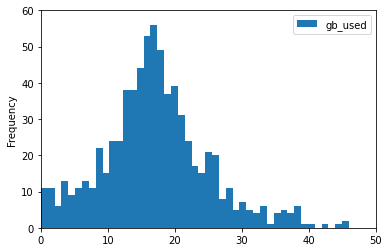

In [37]:
ultimate_revenue_table.plot(y = "gb_used", kind = "hist", bins = 45, xlim = (0,50), ylim = (0,60))
plt.show()

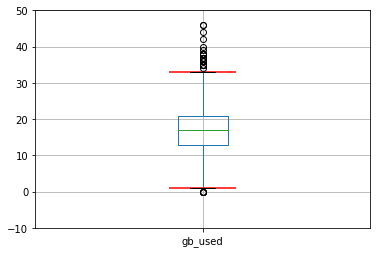

In [38]:
plt.ylim(-10,50)
boxplot_usage_2("gb_used")
plt.show()

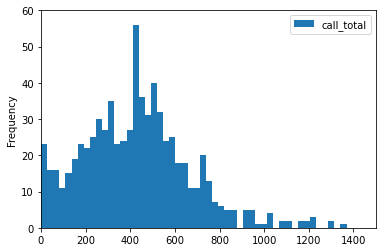

In [39]:
ultimate_revenue_table.plot(y = "call_total", kind = "hist", bins = 50, xlim = (0,1500), ylim = (0,60))
plt.show()

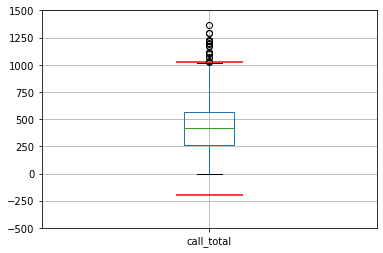

In [40]:
plt.ylim(-500,1500)
boxplot_usage_2("call_total")
plt.show()

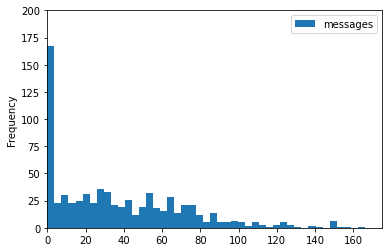

In [41]:
ultimate_revenue_table.plot(y = "messages", kind = "hist", bins = 45, xlim = (0,175), ylim = (0,200))
plt.show()

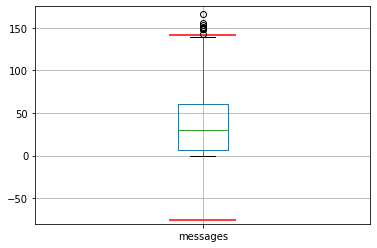

In [42]:
plt.ylim(-80,175)
boxplot_usage_2("messages")
plt.show()

it seems that the most common internet usage is between 13-20 gb a month.
call duration between 500-300 min, with a small skew to the right.
and the peek in messages is at 40 min with a significant skew to the right.

In [43]:
print(ultimate_revenue_table.info())
print(ultimate_revenue_table.describe())
ultimate_revenue_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 2287
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                724 non-null    int64  
 1   first_name             724 non-null    object 
 2   last_name              724 non-null    object 
 3   age                    724 non-null    int64  
 4   city                   724 non-null    object 
 5   plan                   724 non-null    object 
 6   messages_included      724 non-null    int64  
 7   gb_per_month_included  724 non-null    float64
 8   minutes_included       724 non-null    int64  
 9   usd_monthly_pay        724 non-null    int64  
 10  usd_per_gb             724 non-null    int64  
 11  usd_per_message        724 non-null    float64
 12  usd_per_minute         724 non-null    float64
 13  gb_used                724 non-null    float64
 14  (duration, count)      724 non-null    float64
 15  call_

,user_id,first_name,last_name,age,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,"(duration, count)",call_total,messages,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,2.0,16.0,124.0,11.0,70.0
19,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,3.0,2.0,10.0,15.0,70.0
20,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,32.0,7.0,59.0,139.0,84.0
26,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,17.0,54.0,476.0,21.0,70.0
27,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,24.0,50.0,446.0,37.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,15.0,51.0,529.0,0.0,70.0
2269,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,16.0,52.0,450.0,0.0,70.0
2270,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,16.0,59.0,500.0,0.0,70.0
2271,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,15.0,59.0,473.0,0.0,70.0


from what we can see from the deferent distributions, there is almost no clients exceeding the plans regular pay limits. 

## midway analysis conclusion

    1.we can see that both plans users have a quite similar usage patterns, with surf users being a little higher.
    2.most users of surf go over their monthly plan, unlike ultimate users. 
    so much so, that it seems that on average they pay more then ultimate users.
    3. lets test this hypotheses, and see if people from ny-nj have a deferent average then others.

# Test the hypotheses

## average revenue differs

H0:the first hypotheses is that the average revenue the company gets from surf users is the same as ultimate users.

to test the first hypotheses, i need to use the hypotheses on equality of two population means.
i'm using this method, because i'm comparing between two populations, in this case surf and ultimate users, average revenue.
to do so i need to check if they have similar revenue variance.

In [44]:
print(np.var(surf_revenue_table["revenue"]))
np.var(ultimate_revenue_table["revenue"])

3060.5073785813947


128.98115900002801

In [45]:
print(surf_revenue_table["revenue"].mean())
ultimate_revenue_table["revenue"].mean()

60.5517289423685


72.3011049723757

In [46]:
alpha = 0.05

results = st.ttest_ind(surf_revenue_table["revenue"], ultimate_revenue_table["revenue"],equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.2184115852123163e-15
We reject the null hypothesis


we see that the average revenue of the two plans is very different. and from each of there mean i can conclude that the ultimate revenue, brings more revenue then the surf per client.

## ny-nj vs other regions revenue

H1: the second hypotheses, is that people from ny-nj who use the surf plan, probably make the company the same revenue that people from over places make.

now using the same method as before, i am going to check if the people of ny-nj have a bigger revenue then the rest of the clients.

In [47]:
revenue_ny_nj_surf = surf_revenue_table.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
revenue_others_surf = surf_revenue_table.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
print(revenue_ny_nj_surf["revenue"].mean())
revenue_others_surf["revenue"].mean()

56.78958333333336


61.478161010260436

seems that the people that live in ny-nj, that use the surf plan, have a lower mean then people in other places.

In [48]:
print(np.var(revenue_ny_nj_surf["revenue"]))
np.var(revenue_others_surf["revenue"])

2185.4865302751036


3271.638477044339

In [49]:
alpha = 0.05

results = st.ttest_ind(revenue_ny_nj_surf["revenue"], revenue_others_surf["revenue"],equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.13101227519124942
We can't reject the null hypothesis


the H1 hypotheses is wrong, people from nj-ny make the company less revenue then people from over places, in the surf plan.

H2: the third hypotheses, is that people from ny-nj on the ultimate plan, 
    produce the same revenue as other people on the same plan.
    
to find out, lets do the same as before.

In [50]:
revenue_ny_nj_ultimate = ultimate_revenue_table.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
revenue_others_ultimate = ultimate_revenue_table.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
print(revenue_ny_nj_ultimate["revenue"].mean())
revenue_others_ultimate["revenue"].mean()

74.87878787878788


72.04255319148936

seems that the ultimate users in ny-nj have a bigger mean then others. lets see if they are different on average from each other.

In [51]:
print(np.var(revenue_ny_nj_ultimate["revenue"]))
np.var(revenue_others_ultimate["revenue"])

198.92470156106484


121.23223177908642

In [52]:
alpha = 0.05

results = st.ttest_ind(revenue_ny_nj_ultimate["revenue"], revenue_others_ultimate["revenue"],equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.11969451112652207
We can't reject the null hypothesis


we can conclude that people in ny-nj, on average spend more then clients in other places if they use the ultimate plan.

# summary

1. in the data preparation stage:

    1. i changed the data type of duration to int by using astype(), after using the np.ceil to round the values up.
    1. i made shore that all the dates in the tables are in datetime format.
    1. deleted all 0 min calls and all 0 mb, 
       because i feared it well skew the data while trying to find the clients behavior call duration.
       did that by using the query method and the drop method.
    1. i created a month column.
       that helped me create a pivot tables that contain the duration of calls,
       the gb of internet, messages and revenue that each client spends each month.
    1. to create the internet pivot table, i had to divide the mb column by a-1024 and then use np.ciel to round them to gb.
    1. like i did in the previous step, i did for the plan_df table.
    1. created a table that contains call duration, messages, internet and revenue for each client per month.
    1. to create the revenue column in the combined table, fill in the missing values,
       i had to create a function that identifies the plan that the client uses,
       and did he go over the package plan and how much. by identifying those things, 
       i managed to calculate the revenue the company got from each client every month. after creating the function,
       i applied it with the apply method on the table.
       
1. in the analysis stage:

    1. i created two new tables for surf users and for ultimate users.
    1. using this new tables, i created box plots and histograms to see the clients behavior distributed.
    
1. in the hypotheses stage:

    1. the first hypotheses i wanted to check is if people in the surf plan,
       get the company the same revenue as the ultimate plan.
    1. to do so, i first checked if the variance differs between the plans using var().
    1. then i checked if the average revenue of the two programs is equal.
       i did that by using the hypotheses on the equality of two populations mean. i decided the alpha to be 0.05.
    1. afterwards i did the same thing i did before, comparing between the clients of ny-nj vs all the others,
       i did this comparison with surf users and ultimate users separately,
       to see if there is a difference in behavior between the users depending on the plan.
       
## conclusion

1. it seems that on average clients tend to pay more on the ultimate plan.
   the advertising department needs to spend all it's budget on advertising the ultimate plan.
2. i also found that people from ny-nj, tend to bring less revenue then others when their on the surf plan,
   but spend give more revenue then overs per month when their on the ultimate plan.
   so it will be a big boost to the companies revenue to have as much of them as possible on the ultimate plan.
   the advertising department needs to spend more effort on people from this region.